<a href="https://colab.research.google.com/github/flaviowu/btc-c14-g4/blob/main/notebooks/Analise_da_descricao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tratamento nos Dados: Lucas - Drop linhas Duplicados ✔

### Leitura dos Dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/BTC-Dados-G4/train_clean_rev2.csv')
test = pd.read_csv('/content/drive/MyDrive/BTC-Dados-G4/train_clean_rev2.csv')

### Código Prof. Thiago

In [ ]:
from numpy import random
def data(n, seed):

    datas = []
    
    random.seed(seed)
    for i in range(n):
        dia_maximo = 30
        dia_minimo = 1
        mes_maximo = 12
        mes_minimo = 1
        
        dia = int(random.random() * (dia_maximo - dia_minimo) + dia_minimo)
        mes = int(random.random() * (mes_maximo - mes_minimo) + mes_minimo)
        
        datas.append(str(dia)+'-'+str(mes)+'-2018')
        
    return datas

def estoque(n, seed):

    np.random.seed(seed)
    mu, sigma = 1, 20
    s = np.random.normal(mu, sigma, n)
    s[s < 0] = s[s < 0] * -0.5
    s = s.astype(int)
    s[s < 1] = 1
    
    return s

train['date']  = data(n = train.shape[0], seed = 10)
train['stock'] = estoque(n = train.shape[0], seed = 10)

### Drop Linhas Dúplicadas

In [ ]:
def Apaga_Duplicado(data='x', colunas=['y']):
  data = data.drop_duplicates(subset = colunas, keep= 'first', inplace = False)
  return data

In [ ]:
train = Apaga_Duplicado(train, ['name','brand_name','price'])

In [ ]:
train.shape

(1406667, 11)

## Analisar o campo de DESCRIÇÃO ✔

### Import Bibliotecas

In [ ]:
import nltk

nltk.download('all')

In [ ]:
from nltk.corpus import stopwords
import re
import collections

In [ ]:
from spacy.tokens import Span

In [ ]:
import spacy
import spacy.cli
spacy.cli.download('en')

nlp = spacy.load('en_core_web_sm')

### Criando Funções

In [ ]:
amostra = train.head(7000)

In [ ]:
def limpa_texto(data, col): 
  """
  retira pontuações e caracteres especiais, incluindo no df o resultado
  """
  data[col] = data[col].str.lower()
  data[col] = data[col].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", '', x))

In [ ]:
limpa_texto(amostra, 'item_description')

In [ ]:
amostra['item_description']

In [ ]:
def remove_numeros(dados='x', coluna='y'):
  identifica_numero = dados[coluna].str.split().dropna()
  lista_sem_numeros = []

  for palavra in identifica_numero:
    for elemento in palavra:
      if type(elemento) is float or type(elemento) is int:
        ''
      else:
        lista_sem_numeros.append(elemento)

  return lista_sem_numeros

In [ ]:
lista_sem_numeros = remove_numeros(amostra, 'item_description')

In [ ]:
def frequencia_de_palavras(lista):

  ''' Identifica o numero de repetições de cada palavra no texto '''
  
  palavras_comuns = stopwords.words('english')
  lista = [palavra for palavra in lista if palavra not in palavras_comuns]

  return collections.Counter(lista)

In [ ]:
freq_palavras = frequencia_de_palavras(lista_sem_numeros)

In [ ]:
def data_frame_de_frequencia(x):  
  
  ''' Cria um DataFrame com a Frequencia das Palavras '''

  lista_de_palavras = []
  lista_frequencia = []
  for palavra, frequencia in x.items():
    lista_de_palavras.append(palavra)
    lista_frequencia.append(frequencia)
  return pd.DataFrame(
    {'lista_de_palavras': lista_de_palavras,
     'lista_frequencia': lista_frequencia}
      )

In [ ]:
dados_de_frequência = data_frame_de_frequencia(freq_palavras)

In [ ]:
dados_de_frequência.sort_values('lista_frequencia', ascending=False)

In [ ]:
def entidades_do_texto(lista_palavras):

  ''' Revela quais entidades temos nos textos '''

  entidades = []
  for ent in lista_palavras.ents:
    entidades.append(ent.label_)

  entidades = sorted(set(entidades))
  return entidades

### Analisando entidades

In [ ]:
unir_palavras = " ".join(lista_sem_numeros)
unir_palavras = nlp(unir_palavras)

In [ ]:
nome_de_empresas = []
for ent in unir_palavras.ents:
  if ent.label_ == 'ORG':
    nome_de_empresas.append(ent.text)

In [ ]:
#Aplicação de funções 

mais_comentadas = frequencia_de_palavras(nome_de_empresas)
mais_comentadas = data_frame_de_frequencia(mais_comentadas)

In [ ]:
mais_comentadas.sort_values('lista_frequencia', ascending=False, inplace=True)
mais_comentadas.head(5)

,lista_de_palavras,lista_frequencia
0,nwt,85
7,navy,45
62,samsung,36
5,l,17
51,charlotte russe,13


In [ ]:
entidades_do_texto(unir_palavras)

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [ ]:
empresas = mais_comentadas['lista_de_palavras'].values
print('Existem', len(empresas), 'Empresas registradas na coluna Descrição nesta amostra de:', len(amostra))

Existem 292 Empresas registradas na coluna Descrição nesta amostra de: 7000


## Criar Insights ✔

### Visualização

In [ ]:
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
grafico_nuvem = str(unir_palavras)

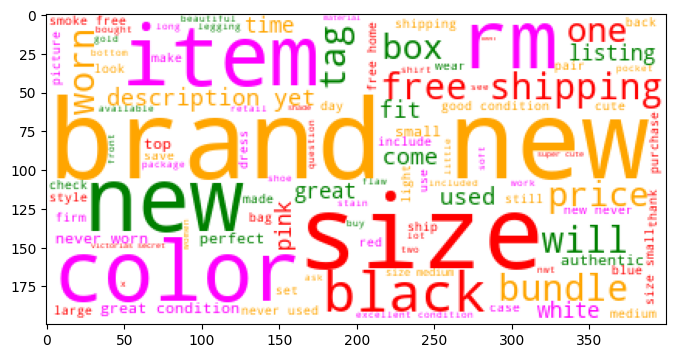

In [ ]:
mapa_cores = ListedColormap(['orange','green','red','magenta'])
nuvem = WordCloud(background_color= 'white', 
                  colormap = mapa_cores,
                  max_words = 100)
nuvem.generate(grafico_nuvem)
plt.figure(figsize=(8,6), dpi=100)
plt.imshow(nuvem)

### 🔮 

1 - A coluna de Descrição apresenta informações como **Cor, Condição do Item, Marca, Data**... Através desses dados o algoritimo poderá reconhecer padrões e ajudar a classifcar melhor.

2 - Podemos criar um atributo que agrupe produtos com preço acima, abaixo ou dentro da média de consumo e verificar se as palavras comuns para diferentes categorias de itens também são distintas. Se forem, esses dados poderão melhoras eficiência do Modelo. 

## Hipóteses ✔

Os nomes das empresas aparecem na Descrição. Podemos usar essa informação para preencher os dados nulos de marca? Ou utilizando a Descrição junto as demais colunas a marca se torna irrelevante para o classificador?



## Construção de Modelos

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
X_train_counts = vectorizer.fit_transform(documentos_titulo)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new = X_train_tfidf

In [ ]:
split_validation = train_test_split(X_new, y, sinopses, test_size=0.20, stratify = y, random_state=10)

(X_train, X_test)             = split_validation[:2]
(y_train, y_test)             = split_validation[2:4]
(titulos_train, titulos_test) = split_validation[4:]

svm = SGDClassifier() 
clf = OneVsRestClassifier(svm)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Resultado F1: {:.4f}'.format( f1_score(y_test, y_pred, average="micro")))
print('Acurácia', round(accuracy_score(y_test, y_pred), 3))